In [1]:
import pandas as pd
import numpy as np
df= pd.read_csv("C:\\data science class\\assignments\\KNN_compl\\Zoo.csv")
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [2]:
print(df.describe())

             hair    feathers        eggs        milk    airborne     aquatic  \
count  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000   
mean     0.425743    0.198020    0.584158    0.405941    0.237624    0.356436   
std      0.496921    0.400495    0.495325    0.493522    0.427750    0.481335   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
75%      1.000000    0.000000    1.000000    1.000000    0.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         predator     toothed    backbone    breathes    venomous        fins  \
count  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000   
mean     0.554455    0.603960    0.821782    0.792079    0.079208    0.168317   
std      0.499505    0.4915

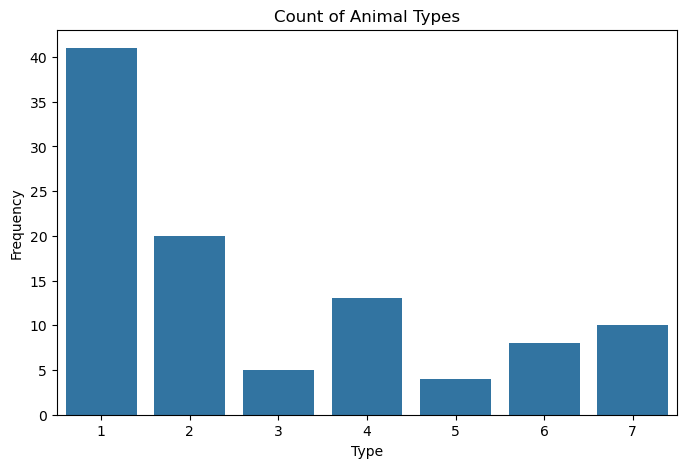

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9456\3388399711.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='legs', palette='Set2')


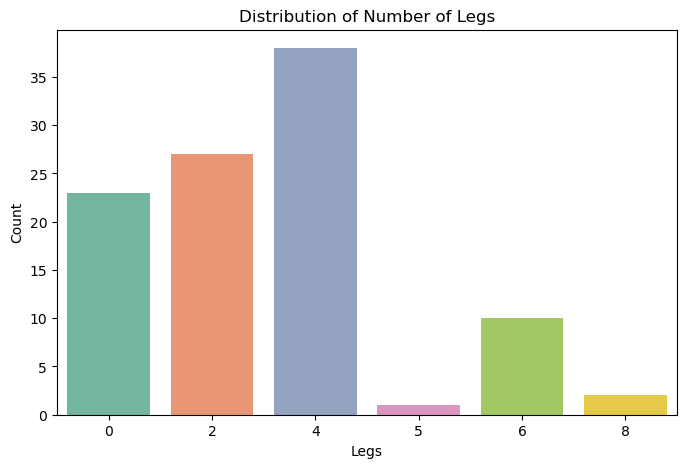

In [3]:
#EDA
import matplotlib.pyplot as plt
import seaborn as sns
# Step 3: Countplot of animal types
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='type')
plt.title('Count of Animal Types')
plt.xlabel('Type')
plt.ylabel('Frequency')
plt.show()

# Step 4: Distribution of number of legs
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='legs', palette='Set2')
plt.title('Distribution of Number of Legs')
plt.xlabel('Legs')
plt.ylabel('Count')
plt.show()

In [4]:
#Data Cleaning
df.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [5]:
#data Transformation
''' no need to transform the data because the data is already transformed'''

' no need to transform the data because the data is already transformed'

In [6]:
#specify features and Target
X= df.iloc[:, 1:17]
Y = df["type"]

In [7]:
#Data partition
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
X_train

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
89,0,0,1,0,0,1,0,1,1,1,0,0,4,0,0,0
26,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0
42,0,0,1,0,1,0,1,0,0,1,0,0,6,0,0,0
70,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1
15,0,0,1,0,0,1,1,0,0,0,0,0,6,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,1
71,0,1,1,0,0,0,1,0,1,1,0,0,2,1,0,1
14,0,0,1,0,0,1,1,0,0,0,0,0,4,0,0,0
92,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,1


In [8]:
#model fiiting
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, Y_train)

#prediction
Y_pred_train=model.predict(X_train)
Y_pred_test=model.predict(X_test)

In [9]:
#Metrics(Accuracy)

import numpy as np
from sklearn.metrics import accuracy_score

traning_score = accuracy_score(Y_train,Y_pred_train)
print("Training Accuracy score:", np.round(traning_score,2))

testing_score = accuracy_score(Y_test,Y_pred_test)
print("Testing Accuracy score:", np.round(testing_score,2))

Training Accuracy score: 0.91
Testing Accuracy score: 0.9


In [10]:
# cross validation - shuffle split
training_accuracy = []
test_accuracy = []
    
for i in range(1,501):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2,random_state=i)
    model.fit(X_train,Y_train)
    Y_pred_traning = model.predict(X_train)
    Y_pred_test = model.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train,Y_pred_traning))
    test_accuracy.append(accuracy_score(Y_test,Y_pred_test))
    
import numpy as np
print("Cross validaton training accuracy:",np.round(np.mean(training_accuracy)*100,2))
print("Cross validaton test accuracy:",np.round(np.mean(test_accuracy)*100,2))


Cross validaton training accuracy: 92.7
Cross validaton test accuracy: 85.42


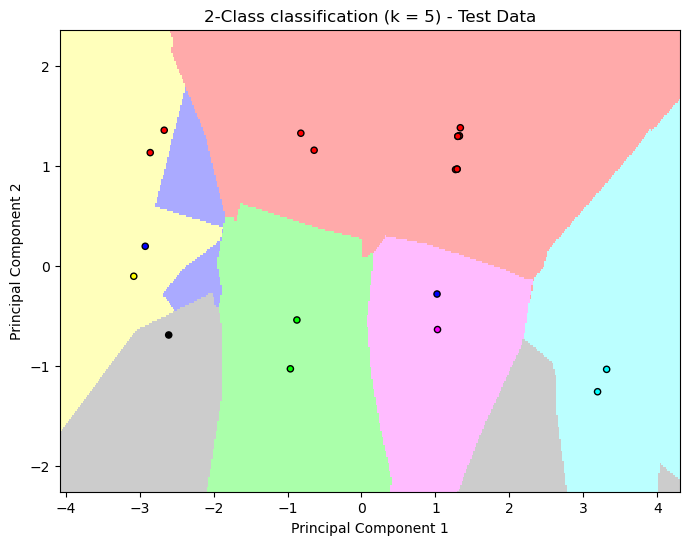

In [11]:
#Decision Boundaries
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Since KNN works best with 2 features for visualization, let's use PCA to reduce dimensionality
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Refit the model on the PCA transformed training data
model_pca = KNeighborsClassifier(n_neighbors=5)
model_pca.fit(X_train_pca, Y_train)

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#FFFFBB', '#FFBBFF', '#BBFFFF', '#CCCCCC'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#FF00FF', '#00FFFF', '#000000'])

# Plot the decision boundary for testing data
h = .02  # step size in the mesh
x_min, x_max = X_test_pca[:, 0].min() - 1, X_test_pca[:, 0].max() + 1
y_min, y_max = X_test_pca[:, 1].min() - 1, X_test_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = model_pca.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=Y_test, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("2-Class classification (k = %i) - Test Data" % 5)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


In [12]:
'''
1.What are the key hyperparameters in KNN?
n_neighbors: The number of nearest neighbors to consider when making a prediction. 
Smaller values can lead to overfitting; larger values to underfitting.
2. What distance metrics can be used in KNN?
In K-Nearest Neighbors (KNN), distance metrics determine how "close" two points are in the feature space. 
Choosing the right distance metric is crucial for the model's accuracy
1. Euclidean Distance:
   =sqrt(sum(sqr(Xi-Yi))) 
   Best for continuous numeric data.
2. Manhattan Distance:
   = sum(moduls(Xi-Yi))

'''

'\n1.What are the key hyperparameters in KNN?\nn_neighbors: The number of nearest neighbors to consider when making a prediction. \nSmaller values can lead to overfitting; larger values to underfitting.\n2. What distance metrics can be used in KNN?\nIn K-Nearest Neighbors (KNN), distance metrics determine how "close" two points are in the feature space. \nChoosing the right distance metric is crucial for the model\'s accuracy\n1. Euclidean Distance:\n   =sqrt(sum(sqr(Xi-Yi))) \n   Best for continuous numeric data.\n2. Manhattan Distance:\n   = sum(moduls(Xi-Yi))\n\n'